In [6]:
import h2o

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,3 hours 32 mins
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.2
H2O cluster version age:,13 days
H2O cluster name:,H2O_started_from_R_raj_cjn618
H2O cluster total nodes:,1
H2O cluster free memory:,2.507 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


In [9]:
url =  "http://h2o-public-test-data.s3.amazonaws.com/smalldata/airlines/allyears2k_headers.zip"
data=h2o.import_file(url)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [10]:
train,valid,test=data.split_frame([0.8,0.1],seed=69)

In [11]:
print("%d/%d/%d" %(train.nrows,valid.nrows,test.nrows))


35255/4272/4451


In [12]:
y ='ArrDelay' # binomial Classification
ignoreFields=['IsArrDelayed','ActualElapsedTime','ArrTime','TailNum']
xWithDep=[i for i in train.names  if i not in ignoreFields]

In [13]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [16]:
m_DLR_def= H2ODeepLearningEstimator(variable_importances=True) 
%time m_DLR_def.train(xWithDep,y,train,validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 325 ms, sys: 57 ms, total: 382 ms
Wall time: 28.8 s


In [17]:
m_DLR_def.model_performance(valid)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 54.46115861360238
RMSE: 7.379780390608001
MAE: 3.7619958293803664
RMSLE: NaN
Mean Residual Deviance: 54.46115861360238


RMSE and MAE might be useful since they are in minutes. So on average it guessed it 3.8 minutes long. 

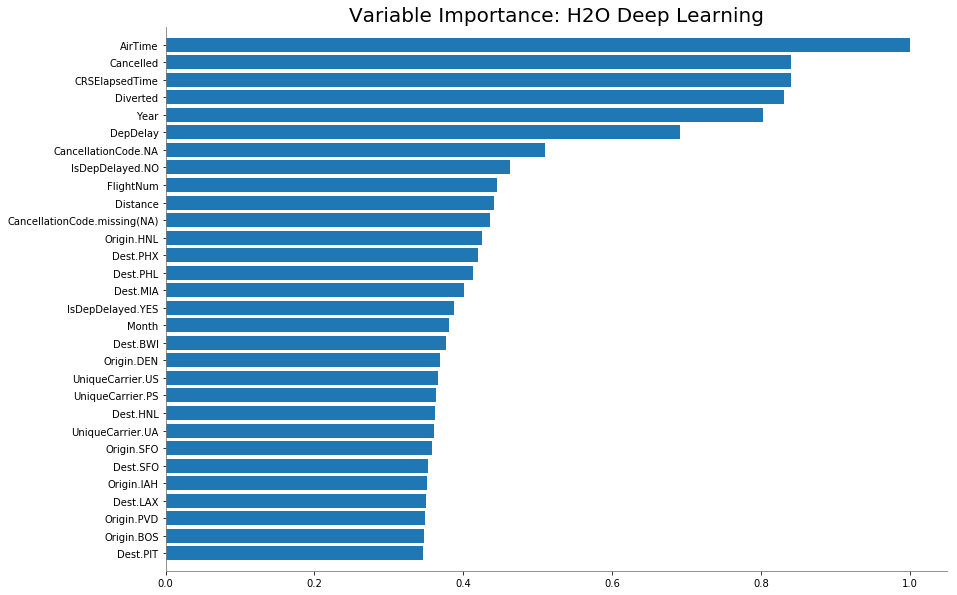

In [19]:
m_DLR_def.varimp_plot(30) # default gives you first 10

In [24]:
m_DLR_200_epochs = H2ODeepLearningEstimator(
variable_importances=True,
epochs=200,
stopping_rounds=5,
stopping_tolerance=0.0,
stopping_metric="deviance"    
)
%time m_DLR_200_epochs.train(xWithDep,y,train,validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 708 ms, sys: 114 ms, total: 821 ms
Wall time: 2min 30s


In [25]:
m_DLR_200_epochs.model_performance(valid)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 45.769990802898214
RMSE: 6.765352230512334
MAE: 3.454343126352751
RMSLE: NaN
Mean Residual Deviance: 45.769990802898214


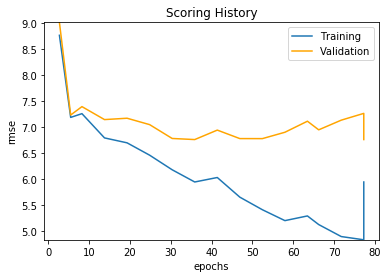

In [26]:
m_DLR_200_epochs.plot()

In [27]:
m_DLR_200_epochs.scoring_history() #training rmse is higher than training_mae which means when it gets it wrong, it gets it wrong

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
0,,2018-06-28 19:35:28,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2018-06-28 19:35:38,9.723 sec,10757 obs/sec,2.758162,1,97239.0,8.767238,76.864458,5.220134,0.912705,9.016083,81.289759,5.419234,0.905380
2,,2018-06-28 19:35:45,16.759 sec,12590 obs/sec,5.515898,2,194463.0,7.191009,51.710609,4.175158,0.941272,7.236962,52.373625,4.251451,0.939038
3,,2018-06-28 19:35:51,23.153 sec,13749 obs/sec,8.272075,3,291632.0,7.262908,52.749835,3.897607,0.940092,7.397920,54.729215,4.043285,0.936296
4,,2018-06-28 19:36:02,34.650 sec,15163 obs/sec,13.793306,5,486283.0,6.797180,46.201651,3.453130,0.947529,7.148881,51.106500,3.663381,0.940513
5,,2018-06-28 19:36:13,45.597 sec,16070 obs/sec,19.315048,7,680952.0,6.702638,44.925351,3.555300,0.948978,7.175045,51.481272,3.869483,0.940076
6,,2018-06-28 19:36:24,56.067 sec,16771 obs/sec,24.836846,9,875623.0,6.465497,41.802656,3.682122,0.952525,7.052274,49.734570,4.012773,0.942110
7,,2018-06-28 19:36:34,1 min 6.552 sec,17245 obs/sec,30.357510,11,1070254.0,6.185197,38.256659,2.873573,0.956552,6.786331,46.054282,3.227062,0.946393
8,,2018-06-28 19:36:44,1 min 16.701 sec,17682 obs/sec,35.880499,13,1264967.0,5.950721,35.411083,3.015904,0.959784,6.765352,45.769991,3.454343,0.946724
9,,2018-06-28 19:36:55,1 min 26.735 sec,18032 obs/sec,41.402610,15,1459649.0,6.036683,36.441536,3.680872,0.958613,6.947019,48.261073,4.190271,0.943825


The distribution of ArrDelay is long-tailed

/Users/raj/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


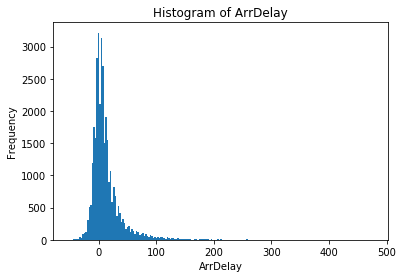

In [28]:
train[y].hist(200)

it looks like a exponential decay

How about we try a laplace distribution ?

In [29]:
m_DLR_laplace = H2ODeepLearningEstimator(
variable_importances=True,
epochs=200,
distribution='laplace'   
)
%time m_DLR_laplace.train(xWithDep,y,train,validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 802 ms, sys: 139 ms, total: 940 ms
Wall time: 2min 8s


In [30]:
m_DLR_laplace.model_performance(valid)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 44.13439366794933
RMSE: 6.643372160879543
MAE: 2.9921968017752745
RMSLE: NaN
Mean Residual Deviance: 2.9921968017752745


In [31]:
all_models=[m_DLR_def,m_DLR_200_epochs,m_DLR_laplace]
#low log loss is better
mae= map(lambda x : x.mae(),all_models)

print(" defaults: %.4f \n 200 epochs : %.4f \n laplace: %.4f \n" % tuple(list(mae)))

rmse= map(lambda x: x.rmse(),all_models)
print(" defaults: %.4f \n 200 epochs : %.4f \n laplace: %.4f \n" % tuple(list(mae)))


TypeError: not enough arguments for format string